In [1]:
import joypy
import pandas as pd
import geopandas as gpd
from matplotlib import cm
import xarray as xr

In [2]:
gpd.options.io_engine = "pyogrio"

In [7]:
# df = gpd.read_file('basin_9_02-22.gpkg')
df = gpd.read_file('../../data/satvistest/basin_data.gpkg')

C:\Users\k000851\AppData\Local\miniforge3\envs\SatvisTest\Lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


In [94]:
# Adds year, month and day as separate columns for filtering purposes
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
# Fills bloomless days with 0
df['fca'] = df['fca'].fillna(0)

,dim_0,time,BASIN_NR,basin_name,area,bloom_area,cloud_area,fca,geometry,year,month,day
0,0,2002-01-01,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002,1,1
1,0,2002-01-02,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002,1,2
2,0,2002-01-03,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002,1,3
3,0,2002-01-04,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002,1,4
4,0,2002-01-05,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8030,0,2023-12-27,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023,12,27
8031,0,2023-12-28,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023,12,28
8032,0,2023-12-29,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023,12,29
8033,0,2023-12-30,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023,12,30


In [ ]:
# TODO Filter dataset on years
# Currently, filter looks through whole dataset for determining time series period

In [147]:
# Selects dates based on the first and last date where fca is higher than 5%
start_date = df.loc[df['fca'] > 0.05].sort_values(['month', 'day']).iloc[0]['time']
end_date = df.loc[df['fca'] > 0.05].sort_values(['month', 'day']).iloc[-1]['time']
print('For the filtered period of time, the start date of the dataset is', start_date.strftime('%m-%d'), 'and the end date is', end_date.strftime('%m-%d'))

For the filtered period of time, the start date of the dataset is 05-31 and the end date is 09-19


In [149]:
# Limitation: Doesn't account for leap years if (let's hope not) bloom season starts before february 29
day_range = end_date.dayofyear - start_date.dayofyear
print(day_range, 'days between the earliest bloom date of any season and the latest of any season')

112 days between the earliest bloom date of any season and the latest of any season


In [ ]:
selected_years = range(2002, 2024)
# selected years = [2002, 2003]

In [138]:
# Creates a mask for the dataset spanning between start_date and end_date
mask = (df['time'].dt.year.isin(selected_years)) & (df['time'].dt.dayofyear >= start_date.dayofyear) & (df['time'].dt.dayofyear <= end_date.dayofyear)
gdf_season = df.loc[mask]

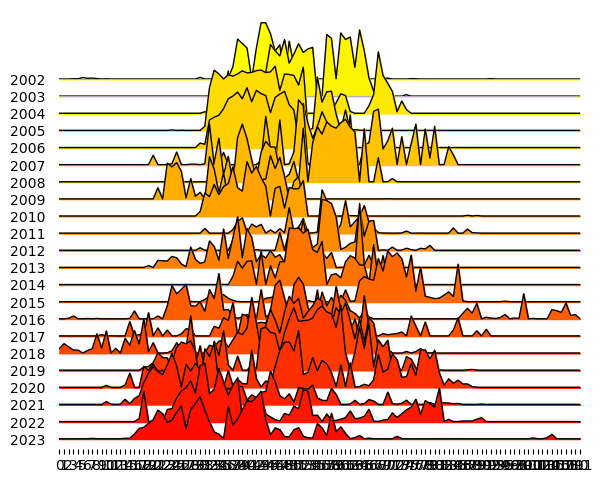

In [143]:
%matplotlib inline

x_range = list(range(day_range))
# labels=[y if y%10==0 else None for y in list(df.time.unique())]
fig, axes = joypy.joyplot(gdf_season, by="year", column="fca", labels=None, 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title=None, kind='values', x_range=x_range,
                          colormap=cm.autumn_r)
axes[-1].set_xticks(x_range);

In [ ]:
# Bell curve or similar of the bloom periods per year